In [1]:
%config IPCompleter.use_jedi = False

In [2]:
import os
import csv # noqa
import json
import struct
import io
import numpy as np
import requests
import time
import cv2
import base64
import random
import matplotlib.pyplot as plt

from tqdm import tqdm
from PIL import Image
from IPython.display import Markdown, display, HTML, IFrame
from pprint import pprint
from random import sample
from urllib.request import urlretrieve
from k12libs.utils.nb_easy import k12ai_get_top_dir, RACEURL
from k12libs.utils.nb_easy import K12AI_DATASETS_ROOT

In [3]:
display(HTML('<style>.container { width:%d%% !important; }</style>' % 90))

In [4]:
API_INFERENCE = f'{RACEURL}/raceai/framework/inference'
API_INFERENCE

'http://116.85.5.40:9119/raceai/framework/inference'

In [5]:
API_POPMSG = f'{RACEURL}/raceai/private/popmsg'
API_POPMSG 

'http://116.85.5.40:9119/raceai/private/popmsg'

In [6]:
MODEL_TASK = 'zmq.yolov5l.inference'
MSGKEY = 'zmq.yolo.test'
CONF_THRES = 0.25
IOU_THRES = 0.45
IMG_ROOT = '/raceai/data/datasets/casia_facev5'

## 调试

In [7]:
reqdata = '''{
    "task": "%s",
    "cfg": {
        "pigeon": {
            "msgkey": "%s",
            "user": "1",
            "uuid": "100"
        },
        "data": {
            "class_name": "raceai.data.process.PathListDataLoader",
            "params": {
                "data_source": [
                    "val/face_197.jpeg",
                    "val/face_226.jpeg"
                ],
                "dataset": {
                    "class_name": "raceai.data.RawRaceDataset",
                    "params": {
                        "data_prefix": "/raceai/data/datasets/faces/images/"
                    }
                }
            }
        },
        "nms":{
            "conf_thres": %.2f,
            "iou_thres": %.2f
        }
    }
}''' % (MODEL_TASK, MSGKEY, CONF_THRES, IOU_THRES)

### 输入

只需要修改: `data_source` 和 `data_prefix`

In [8]:
print(reqdata)

{
    "task": "zmq.yolov5l.inference",
    "cfg": {
        "pigeon": {
            "msgkey": "zmq.yolo.test",
            "user": "1",
            "uuid": "100"
        },
        "data": {
            "class_name": "raceai.data.process.PathListDataLoader",
            "params": {
                "data_source": [
                    "val/face_197.jpeg",
                    "val/face_226.jpeg"
                ],
                "dataset": {
                    "class_name": "raceai.data.RawRaceDataset",
                    "params": {
                        "data_prefix": "/raceai/data/datasets/faces/images/"
                    }
                }
            }
        },
        "nms":{
            "conf_thres": 0.25,
            "iou_thres": 0.45
        }
    }
}


In [9]:
reqdata = eval(reqdata)
json.loads(requests.get(url=f'{API_POPMSG}?key={MSGKEY}').text)
json.loads(requests.post(url=API_INFERENCE, json=reqdata).text)
time.sleep(3)

In [10]:
json.loads(requests.get(url=f'{API_POPMSG}?key={MSGKEY}').text)

[{'pigeon': {'msgkey': 'zmq.yolo.test', 'user': '1', 'uuid': '100'},
  'task': 'zmq.yolov5l.inference',
  'errno': 0,
  'result': [{'image_path': 'val/face_197.jpeg',
    'faces_det': [{'conf': '0.263', 'xyxy': [144, 26, 223, 120]},
     {'conf': '0.418', 'xyxy': [421, 133, 532, 267]}]},
   {'image_path': 'val/face_226.jpeg',
    'faces_det': [{'conf': '0.258', 'xyxy': [4532, 1656, 5085, 2254]}]}],
  'running_time': 0.797}]

### 输出

通过判断`faces_det`里面有多少个json对象, 每个json对象表示图片中的一个脸, 其中conf表示人脸的置信度, xyxy表示标注人脸的矩形框

```
{
    "pigeon": {
        "msgkey": "zmq.yolov5x.test",
        "user": "1", 
        "uuid": "100"
    }, 
    "task": "zmq.yolov5x.inference", 
    "errno": 0, 
    "result": [
        {
            "image_path": "/raceai/data/datasets/faces/images/val/face_197.jpeg", 
            "faces_det": [
                {
                    "conf": "0.571", 
                    "xyxy": [
                        8, 
                        1, 
                        275, 
                        264
                    ]
                }, 
                {
                    "conf": "0.667", 
                    "xyxy": [
                        268, 
                        90, 
                        403, 
                        325
                    ]
                }, 
                {
                    "conf": "0.859", 
                    "xyxy": [
                        0, 
                        111, 
                        299, 
                        328
                    ]
                }, 
                {
                    "conf": "0.892", 
                    "xyxy": [
                        290, 
                        102, 
                        612, 
                        331
                    ]
                }
            ]
        }, 
        {
            "image_path": "/raceai/data/datasets/faces/images/val/face_226.jpeg", 
            "faces_det": [
                {
                    "conf": "0.385", 
                    "xyxy": [
                        2228, 
                        624, 
                        3117, 
                        1464
                    ]
                }, 
                {
                    "conf": "0.703", 
                    "xyxy": [
                        1241, 
                        826, 
                        3321, 
                        3000
                    ]
                }, 
                {
                    "conf": "0.854", 
                    "xyxy": [
                        2488, 
                        744, 
                        4137, 
                        3013
                    ]
                }, 
                {
                    "conf": "0.909", 
                    "xyxy": [
                        3769, 
                        739, 
                        5616, 
                        2284
                    ]
                }, 
                {
                    "conf": "0.913", 
                    "xyxy": [
                        216, 
                        1389, 
                        1746, 
                        2969
                    ]
                }, 
                {
                    "conf": "0.928", 
                    "xyxy": [
                        4036, 
                        1365, 
                        5511, 
                        3107
                    ]
                }
            ]
        }
    ]
}
```

## 单张Base64

In [11]:
test_face1 = '/hzcsk12/hzcsnote/assets/images/face_0.jpeg'
test_image1 = cv2.cvtColor(cv2.imread(test_face1), cv2.COLOR_BGR2RGB)

def img2b64(path):
    with open(path, 'rb') as fr:
        b4data = base64.b64encode(fr.read()).decode()
    return b4data

reqdata = '''{
    "task": "%s",
    "cfg": {
        "pigeon": {
            "msgkey": "%s",
            "user": "1",
            "uuid": "100"
        },
        "data": {
            "class_name": "raceai.data.process.Base64DataLoader",
            "params": {
                "data_source": "%s",
                "dataset": {
                    "class_name": "raceai.data.RawRaceDataset",
                    "params": {}
                }
            }
        },
        "nms":{
            "conf_thres": %.2f,
            "iou_thres": %.2f
        }
    }
}''' % (MODEL_TASK, MSGKEY, img2b64(test_face1), CONF_THRES, IOU_THRES)

reqdata = eval(reqdata)
json.loads(requests.get(url=f'{API_POPMSG}?key={MSGKEY}').text)
json.loads(requests.post(url=API_INFERENCE, json=reqdata).text)
time.sleep(3)

[{'pigeon': {'msgkey': 'zmq.yolo.test', 'user': '1', 'uuid': '100'}, 'task': 'zmq.yolov5l.inference', 'errno': 0, 'result': [{'image_path': '/tmp/b4img_1612531812.png', 'faces_det': [{'conf': '0.253', 'xyxy': [370, 67, 432, 158]}, {'conf': '0.279', 'xyxy': [52, 73, 108, 156]}]}], 'running_time': 0.171}]


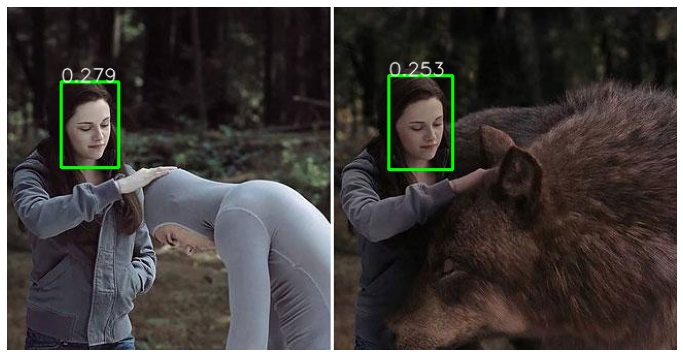

In [12]:
resdata = json.loads(requests.get(url=f'{API_POPMSG}?key={MSGKEY}').text)
print(resdata)
for data in resdata:
    for result in data['result']:
        for item in result['faces_det']:
            xyxy = tuple(item['xyxy'])
            cv2.rectangle(test_image1, xyxy[0:2], xyxy[2:], (0, 255, 0), 2)
            cv2.putText(test_image1, item['conf'], xyxy[0:2], 0, 0.6, (255, 255, 255), lineType=cv2.LINE_AA)
        
plt.figure(figsize=(12, 8))
plt.imshow(test_image1)
plt.axis('off');

## 批量探测

In [13]:
with open(f'{IMG_ROOT}/files.txt', 'r') as fr:
    facesfiles = fr.read().split('\n')[:-2]

In [14]:
image_files = random.choices(facesfiles, k=20)

reqdata = '''{
    "task": "%s",
    "cfg": {
        "pigeon": {
            "msgkey": "%s",
            "user": "1",
            "uuid": "100"
        },
        "data": {
            "class_name": "raceai.data.process.PathListDataLoader",
            "params": {
                "data_source": %s,
                "dataset": {
                    "class_name": "raceai.data.RawRaceDataset",
                    "params": {
                        "data_prefix": "%s"
                    }
                }
            }
        },
        "nms":{
            "conf_thres": %.2f,
            "iou_thres": %.2f
        }
    }
}''' % (MODEL_TASK, MSGKEY, json.dumps(image_files), IMG_ROOT, CONF_THRES, IOU_THRES)

reqdata = eval(reqdata)
json.loads(requests.get(url=f'{API_POPMSG}?key={MSGKEY}').text)
json.loads(requests.post(url=API_INFERENCE, json=reqdata).text)
time.sleep(5)

[{'pigeon': {'msgkey': 'zmq.yolo.test', 'user': '1', 'uuid': '100'}, 'task': 'zmq.yolov5l.inference', 'errno': 0, 'result': [{'image_path': '071/071_2.bmp', 'faces_det': [{'conf': '0.424', 'xyxy': [245, 125, 400, 298]}]}, {'image_path': '082/082_1.bmp', 'faces_det': [{'conf': '0.379', 'xyxy': [288, 83, 409, 228]}]}, {'image_path': '027/027_3.bmp', 'faces_det': [{'conf': '0.346', 'xyxy': [280, 136, 394, 274]}]}, {'image_path': '052/052_4.bmp', 'faces_det': [{'conf': '0.278', 'xyxy': [303, 168, 391, 278]}]}, {'image_path': '014/014_0.bmp', 'faces_det': [{'conf': '0.307', 'xyxy': [252, 133, 392, 302]}]}, {'image_path': '064/064_3.bmp', 'faces_det': [{'conf': '0.330', 'xyxy': [282, 139, 412, 289]}]}, {'image_path': '044/044_1.bmp', 'faces_det': [{'conf': '0.337', 'xyxy': [304, 150, 408, 287]}]}, {'image_path': '031/031_4.bmp', 'faces_det': [{'conf': '0.320', 'xyxy': [265, 169, 408, 329]}]}, {'image_path': '083/083_2.bmp', 'faces_det': [{'conf': '0.433', 'xyxy': [300, 123, 426, 276]}]}, {'i

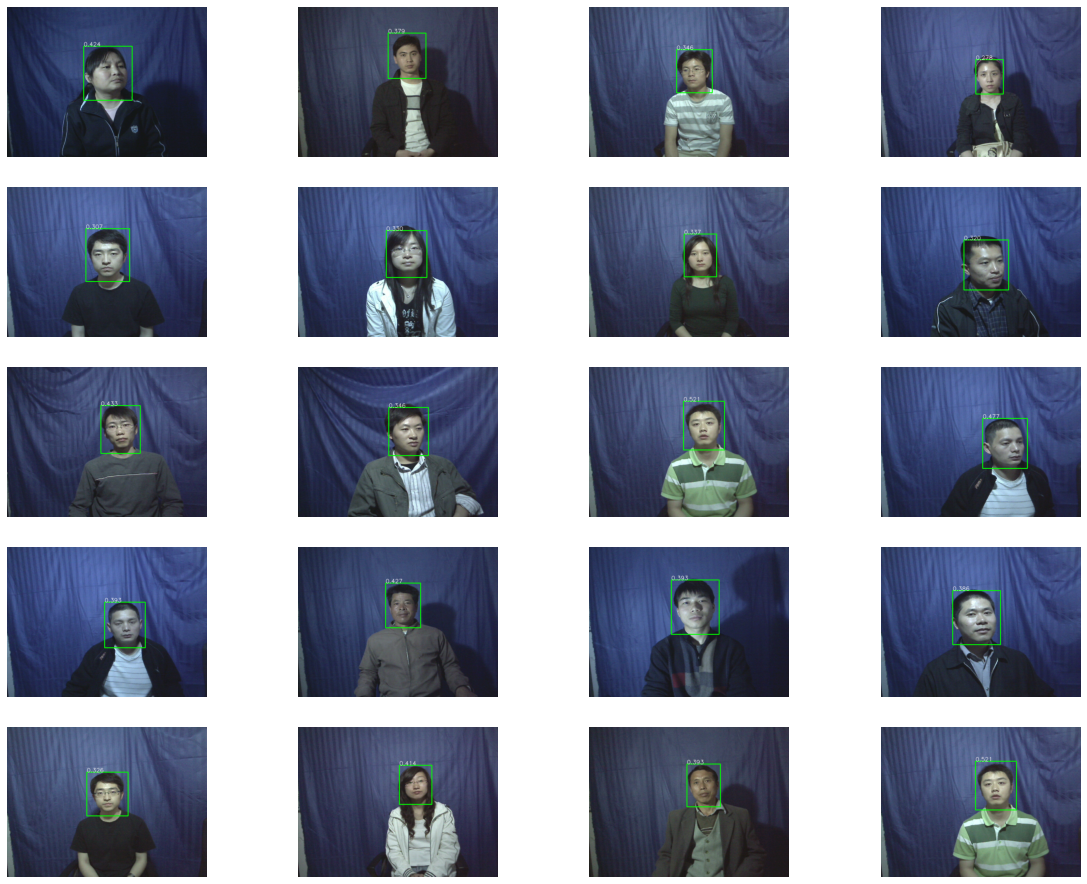

In [15]:
plt.figure(figsize=(20, 16))
resdata = json.loads(requests.get(url=f'{API_POPMSG}?key={MSGKEY}').text)
print(resdata)
for data in resdata:
    for i, result in enumerate(data['result']):
        image_path = f'{IMG_ROOT}/{result["image_path"]}'
        image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
        for item in result['faces_det']:
            xyxy = tuple(item['xyxy'])
            cv2.rectangle(image, xyxy[0:2], xyxy[2:], (0, 255, 0), 2)
            cv2.putText(image, item['conf'], xyxy[0:2], 0, 0.6, (255, 255, 255), lineType=cv2.LINE_AA)
        plt.subplot(5, 4, i+1)
        plt.imshow(image)
        plt.axis('off');

## 封装测试

In [16]:
def test_yolo(task, msgkey, testimgs, conf=0.25, iou=0.45, show=True):
    ncol = 5
    nrow = (len(testimgs) + ncol - 1) // ncol
    
    reqdata = '''{
        "task": "%s",
        "cfg": {
            "pigeon": {
                "msgkey": "%s",
                "user": "1",
                "uuid": "100"
            },
            "data": {
                "class_name": "raceai.data.process.PathListDataLoader",
                "params": {
                    "data_source": %s,
                    "dataset": {
                        "class_name": "raceai.data.RawRaceDataset",
                        "params": {
                            "data_prefix": "%s"
                        }
                    }
                }
            },
            "nms":{
                "conf_thres": %.2f,
                "iou_thres": %.2f
            }
        }
    }''' % (task, msgkey, json.dumps(testimgs), IMG_ROOT, conf, iou)

    reqdata = eval(reqdata)
    json.loads(requests.get(url=f'{API_POPMSG}?key={msgkey}').text)
    json.loads(requests.post(url=API_INFERENCE, json=reqdata).text)
    time.sleep(nrow * 0.7)

    if show:
        plt.figure(figsize=(nrow * 4, ncol * 4))
    resdata = json.loads(requests.get(url=f'{API_POPMSG}?key={msgkey}').text)
    # print(resdata)
    det_face_cnt = 0
    for data in resdata:
        for i, result in enumerate(data['result']):
            if len(result['faces_det']) > 0:
                det_face_cnt += 1
            if not show:
                continue
            image_path = f'{IMG_ROOT}/{result["image_path"]}'
            image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
            for item in result['faces_det']:
                xyxy = tuple(item['xyxy'])
                cv2.rectangle(image, xyxy[0:2], xyxy[2:], (0, 255, 0), 2)
                cv2.putText(image, item['conf'], xyxy[0:2], 0, 0.6, (255, 255, 255), lineType=cv2.LINE_AA)
            plt.subplot(nrow, ncol, i+1)
            plt.imshow(image)
            plt.axis('off');
    rate = 100.0 * det_face_cnt / len(testimgs)
    if show:
        plt.show();
        print('rate:', rate, 'conf threshold:', conf, 'iou threshold:', iou)
    return rate


def calc_det_rate(task, conf, iou, testcnt=20):
    det_rates = []
    for _ in tqdm(range(testcnt)):
        det_rates.append(test_yolo(
            task, MSGKEY,
            random.choices(facesfiles, k=25),
            conf, iou, show=False))
    print(f'rate: {np.mean(det_rates)}, task: {task}, conf: {conf}, iou: {iou}')

### yolov5s

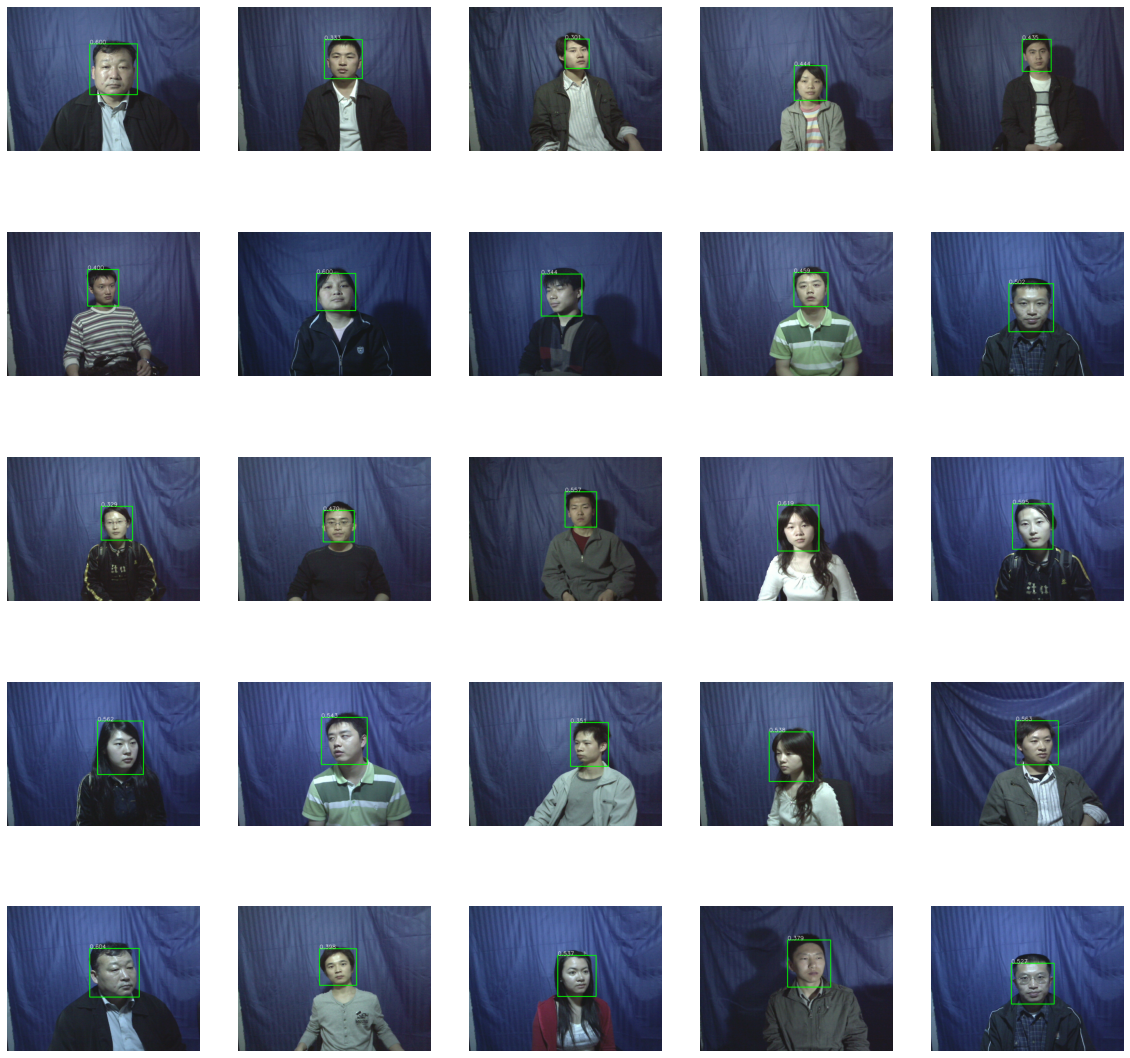

rate: 100.0 conf threshold: 0.2 iou threshold: 0.5


100.0

In [17]:
test_yolo(
    'zmq.yolov5s.inference',
    MSGKEY,
    random.choices(facesfiles, k=25),
    0.2, 0.5)

In [18]:
calc_det_rate('zmq.yolov5s.inference', 0.2, 0.60)

100%|██████████| 20/20 [01:10<00:00,  3.52s/it]

rate: 99.0, task: zmq.yolov5s.inference, conf: 0.2, iou: 0.6


## yolov5m

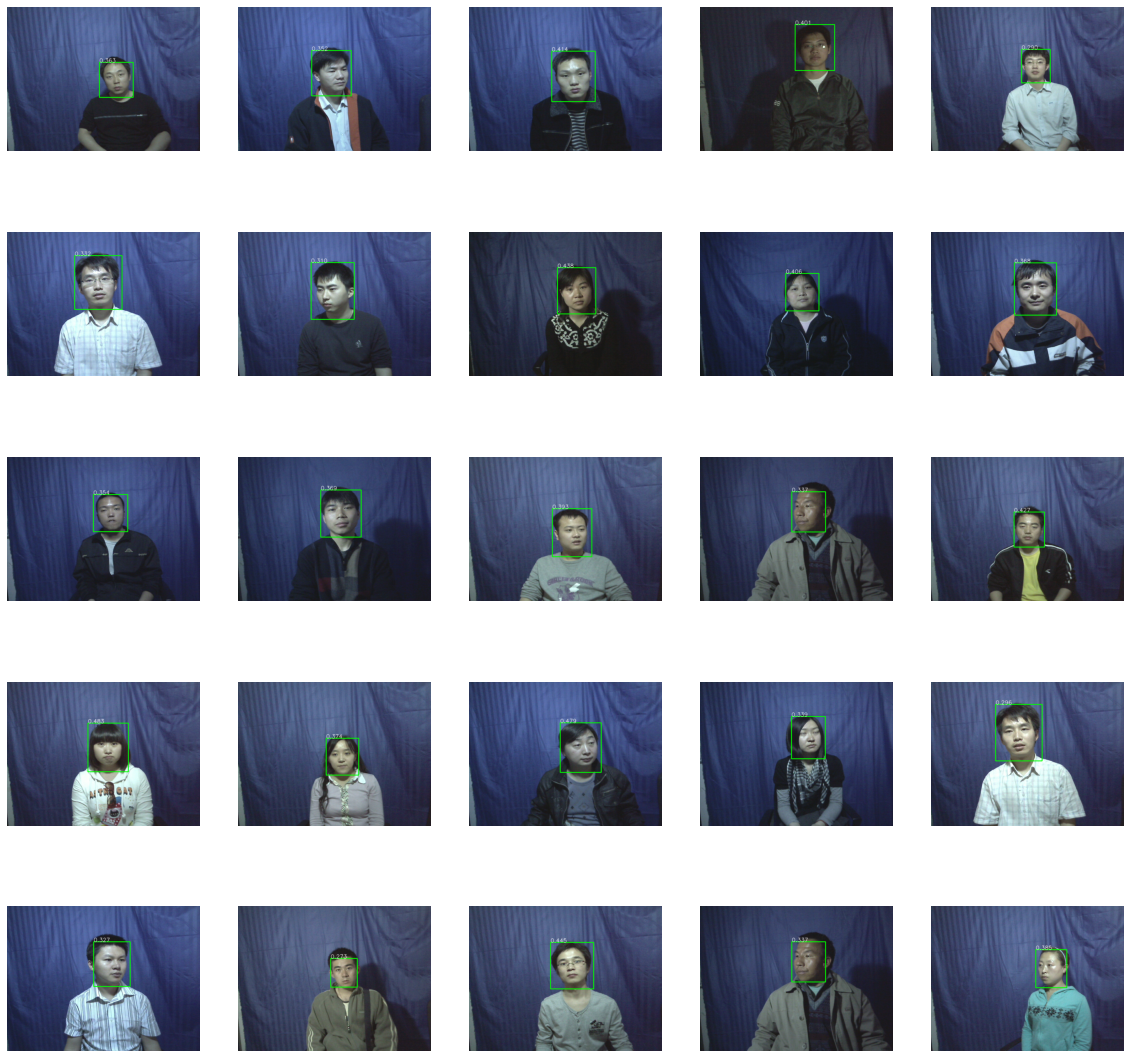

rate: 100.0 conf threshold: 0.2 iou threshold: 0.5


100.0

In [19]:
test_yolo(
    'zmq.yolov5m.inference',
    MSGKEY,
    random.choices(facesfiles, k=25),
    0.20, 0.5)

In [20]:
calc_det_rate('zmq.yolov5m.inference', 0.30, 0.5)

100%|██████████| 20/20 [01:10<00:00,  3.52s/it]

rate: 87.8, task: zmq.yolov5m.inference, conf: 0.3, iou: 0.5


### yolov5l

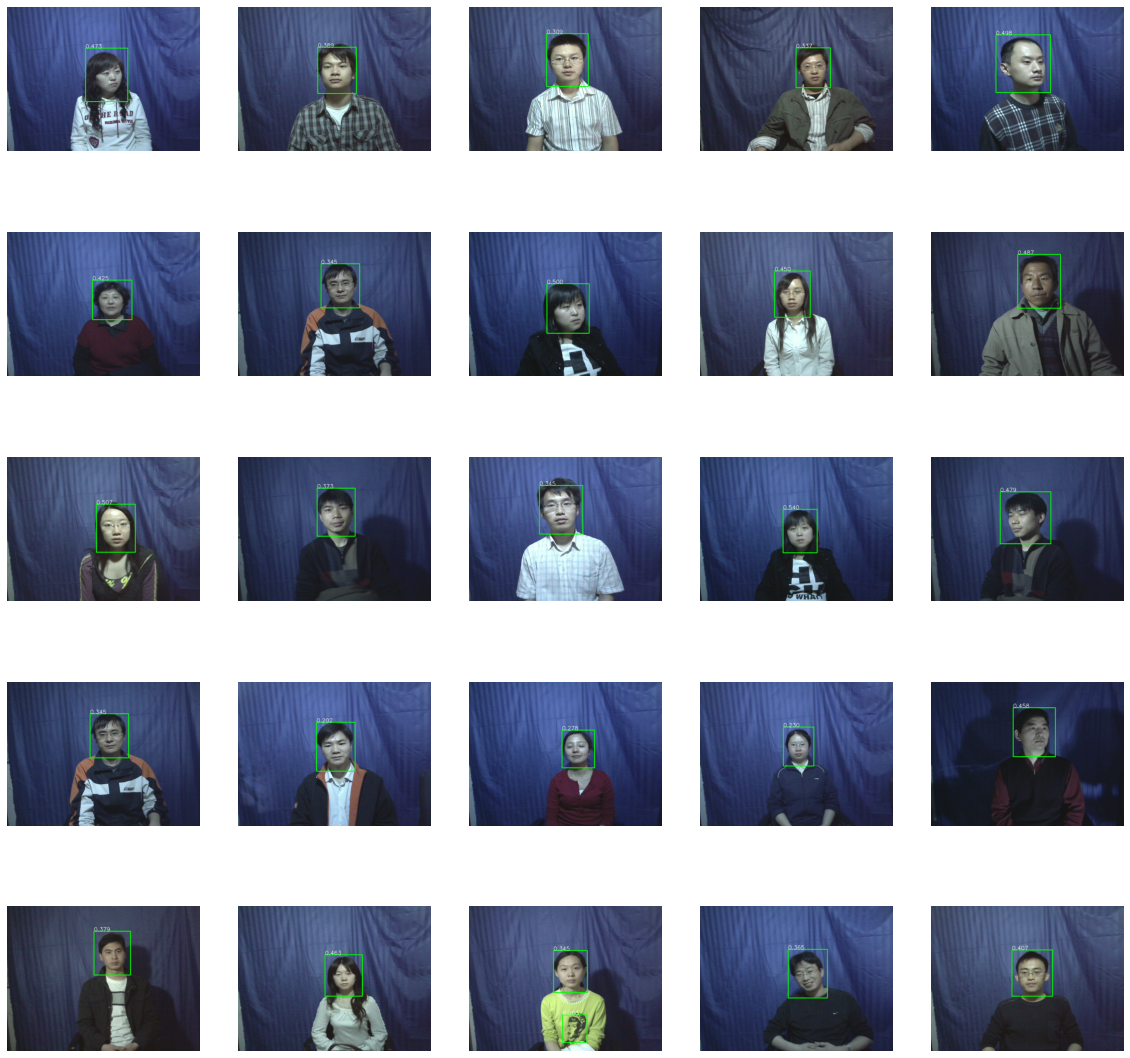

rate: 100.0 conf threshold: 0.2 iou threshold: 0.5


100.0

In [21]:
test_yolo(
    'zmq.yolov5l.inference',
    MSGKEY,
    random.choices(facesfiles, k=25),
    0.2, 0.5)

In [22]:
calc_det_rate('zmq.yolov5l.inference', 0.35, 0.5)

100%|██████████| 20/20 [01:10<00:00,  3.53s/it]

rate: 72.0, task: zmq.yolov5l.inference, conf: 0.35, iou: 0.5


## yolov5x

In [23]:
test_yolo(
    'zmq.yolov5x.inference',
    MSGKEY,
    random.choices(facesfiles, k=25),
    CONF_THRES, IOU_THRES)

<Figure size 1440x1440 with 0 Axes>

rate: 0.0 conf threshold: 0.25 iou threshold: 0.45


0.0

In [24]:
calc_det_rate('zmq.yolov5x.inference', 0.25, 0.45)

100%|██████████| 20/20 [01:10<00:00,  3.52s/it]

rate: 0.0, task: zmq.yolov5x.inference, conf: 0.25, iou: 0.45


## 识别率

### Level:70

```
{
    "task": "zmq.yolov5l.inference", // 1
    "cfg": {
        "pigeon": {
            "msgkey": "xxx",
            "user": "1",
            "uuid": "100"
        },
        "data": {
            "class_name": "raceai.data.process.PathListDataLoader",
            "params": {
                "data_source": [],
                "dataset": {
                    "class_name": "raceai.data.RawRaceDataset",
                    "params": {
                        "data_prefix": "yyy"
                    }
                }
            }
        },
        "nms":{
            "conf_thres": 0.35,  // 2
            "iou_thres": 0.5     // 3
        }
    }
}
```

### Level:80

```
{
    "task": "zmq.yolov5m.inference", // 1
    "cfg": {
        "pigeon": {
            "msgkey": "xxx",
            "user": "1",
            "uuid": "100"
        },
        "data": {
            "class_name": "raceai.data.process.PathListDataLoader",
            "params": {
                "data_source": [],
                "dataset": {
                    "class_name": "raceai.data.RawRaceDataset",
                    "params": {
                        "data_prefix": "yyy"
                    }
                }
            }
        },
        "nms":{
            "conf_thres": 0.30,  // 2
            "iou_thres": 0.5     // 3
        }
    }
}
```

### Level:90

```
{
    "task": "zmq.yolov5s.inference", // 1
    "cfg": {
        "pigeon": {
            "msgkey": "xxx",
            "user": "1",
            "uuid": "100"
        },
        "data": {
            "class_name": "raceai.data.process.PathListDataLoader",
            "params": {
                "data_source": [],
                "dataset": {
                    "class_name": "raceai.data.RawRaceDataset",
                    "params": {
                        "data_prefix": "yyy"
                    }
                }
            }
        },
        "nms":{
            "conf_thres": 0.2,  // 2
            "iou_thres": 0.6    // 3
        }
    }
}
```

## References

- [人脸数据集](https://www.geticsen.cn/Index/article/content/230.html)